# Advanced Pandas

# Pivot tables

Pivot tables are a way of organizing data so that the values of particular combinations of features are highlighted.  For example, if you're looking at resale value of used cars, and have a long list of used cars before you, a pivot table could help you see the average resale value of a red 2013 Honda Fit.



How a pivot table works is best illustrated with an example (modified from the API reference).

In [ ]:
import pandas as pd

df = pd.DataFrame({"Creature": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "Type": ["one", "one", "one", "two", "two",
                          "one", "one", "two", "two"],
                   "Size": ["small", "large", "large", "small", "small",
                         "large", "small", "small", "large"],
                   "Number": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "Number2": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

There are repeated values and a missing combination of features (no "foo two large"), but these facts are hard to determine by scanning the data.  Instead, we can create a table that summarizes the average values for each combination of Creature, Type, and Size.

In [32]:
import numpy as np

table = pd.pivot_table(df, values='Number',
                       index=['Creature', 'Type'],
                       columns=['Size'],
                       aggfunc=np.mean)
table

Size           large  small
Creature Type              
bar      one     4.0    5.0
         two     7.0    6.0
foo      one     2.0    1.0
         two     NaN    3.0

The table shows the average value for each combination of three attributes (Creature, Type, and Size), putting NaN where no such combination was found.  Creature and Type were passed as indices, so their combinations appear on the left.  Size was passed as a column.  And numpy.mean was given as the way to combine multiple values for the same feature combinations; we could have added instead if we were looking at total sales or something similar.  (Notice also that the Number2 values were dropped, as all the values are now from column Number.)

Here's a slightly less abstract example.

In [33]:
df = pd.DataFrame({"Model": ["Fit", "Corolla", "Civic", "Fit", "Civic",
                             "Corolla","Civic", "Fit", "Corolla",
                             "Fit", "Civic"],
                   "Color": ["red", "blue", "red", "silver", "red",
                             "blue", "silver", "red", "blue",
                             "silver", "silver"],
                   "Year": [2009, 2010, 2009, 2011, 2012,
                          2012, 2009, 2010, 2011, 2010, 2012],
                   "Price": [3300, 3600, 3000, 4000, 4200,
                             4300, 2000, 3000, 3600, 3200,4500]})
df

,Model,Color,Year,Price
0,Fit,red,2009,3300
1,Corolla,blue,2010,3600
2,Civic,red,2009,3000
3,Fit,silver,2011,4000
4,Civic,red,2012,4200
5,Corolla,blue,2012,4300
6,Civic,silver,2009,2000
7,Fit,red,2010,3000
8,Corolla,blue,2011,3600
9,Fit,silver,2010,3200


In [ ]:
table = pd.pivot_table(df, values='Price',
                       index=['Model', 'Color'],
                       columns=['Year'],
                       aggfunc=np.mean)
table



The same grouping that we see in the rows, we could perform in the columns.  Each entry still represents the intersection of 3 attributes.

In [35]:
table = pd.pivot_table(df, values='Price',
                       index=['Color'],
                       columns=['Model','Year'],
                       aggfunc=np.mean)
table

Model    Civic         Corolla                     Fit                
Year      2009    2012    2010    2011    2012    2009    2010    2011
Color                                                                 
blue       NaN     NaN  3600.0  3600.0  4300.0     NaN     NaN     NaN
red     3000.0  4200.0     NaN     NaN     NaN  3300.0  3000.0     NaN
silver  2000.0  4500.0     NaN     NaN     NaN     NaN  3200.0  4000.0

With so many missing values, we could decide to not care about the year.  This will group entries with different years together, as long as they agree on Model and Color.

In [36]:
table = pd.pivot_table(df, values='Price',
                       index=['Model'], columns=['Color'],
                       aggfunc=np.mean)
table

Color,blue,red,silver
Model,,,
Civic,NaN,3600.0,3250.0
Corolla,3833.333333,NaN,NaN
Fit,NaN,3150.0,3600.0


Now all the different years are being averaged together for the same color and model of car.


The fill_value parameter replaces the NaN's with some other value.

In [37]:
table = pd.pivot_table(df, values='Price', index=['Model'],
                       columns=['Color'], aggfunc=np.mean,
                       fill_value=0)
table

Color,blue,red,silver
Model,,,
Civic,0.000000,3600,3250
Corolla,3833.333333,0,0
Fit,0.000000,3150,3600


It's also possible to include multiple values and multiple statistics  in the same table, using different columns.  aggfunc can take a dictionary from value name to function instead of a single function as its argument.  The dictionary values can even be lists of functions instead of single functions. See the example below.

In [38]:
table = pd.pivot_table(df, values=['Year','Price'],
                       index=['Model', 'Color'],
                       aggfunc={'Year': [min, max], 'Price': np.mean})
table

Price  Year      
                       mean   max   min
Model   Color                          
Civic   red     3600.000000  2012  2009
        silver  3250.000000  2012  2009
Corolla blue    3833.333333  2012  2010
Fit     red     3150.000000  2010  2009
        silver  3600.000000  2011  2010

The pivot table is for seeing patterns in data, so you should use whatever layout best illustrates answers your questions.  For example, we could ask, does color change how a car's value changes over time?  As we're watching price change with the year over time, it makes sense to make the color a row, and the year a column.

In [39]:
table = pd.pivot_table(df, values='Price', index=['Color'],
                       columns=['Year'], aggfunc=np.mean)
table

Year,2009,2010,2011,2012
Color,,,,
blue,NaN,3600.0,3600.0,4300.0
red,3150.0,3000.0,NaN,4200.0
silver,2000.0,3200.0,4000.0,4500.0


If the table itself isn't easy to read, it's straightforward to pass the pivot table to one of several kinds of plot with the plot() method of the dataframe.  See the pandas.DataFrame.plot() documentation for more types.

<AxesSubplot:xlabel='Color'>

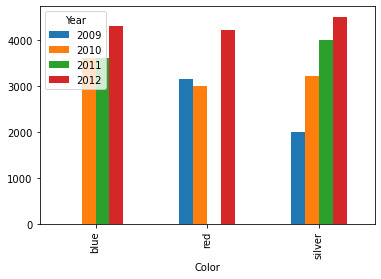

In [40]:
table.plot(kind='bar')

# Exercise

Try predicting what the table will look like when the following pivot_table methods are called.

In [41]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"Student": ["Alice", "Bob", "Chu", "Dedue", "Egla", "Fatima","Grund"],
                   "GPA": [4.0, 3.5, 3.8, 2.8, 3.9, 3.7, 4.0],
                   "GradYear": [2022, 2023, 2022, 2024, 2022, 2024, 2023],
                   "Major": ["EE","CS","EE","CS","EE","CS","EE"],
                   "Took110": [False, True, False, True, False, False, False]})
df

,Student,GPA,GradYear,Major,Took110
0,Alice,4.0,2022,EE,False
1,Bob,3.5,2023,CS,True
2,Chu,3.8,2022,EE,False
3,Dedue,2.8,2024,CS,True
4,Egla,3.9,2022,EE,False
5,Fatima,3.7,2024,CS,False
6,Grund,4.0,2023,EE,False


In [42]:
table = pd.pivot_table(df, values='GPA', index=['Major'], columns=['GradYear'], aggfunc=np.mean)
table

GradYear,2022,2023,2024
Major,,,
CS,NaN,3.5,3.25
EE,3.9,4.0,NaN


In [43]:
table = pd.pivot_table(df, values='GPA', index=['Major','GradYear'], aggfunc={'GPA': [np.mean, max]})
table

max  mean
Major GradYear           
CS    2023      3.5  3.50
      2024      3.7  3.25
EE    2022      4.0  3.90
      2023      4.0  4.00

In [44]:
table = pd.pivot_table(df, values='GPA', index=['Major'], columns=['GradYear','Took110'], aggfunc=np.mean)
table

GradYear  2022  2023        2024      
Took110  False False True  False True 
Major                                 
CS         NaN   NaN   3.5   3.7   2.8
EE         3.9   4.0   NaN   NaN   NaN

# Groupby

A related method is groupby(), which groups the entries by a particular value they have in common (such as same model of car).  This allows for a quick mean() of the other features of those individuals.  It's like a pivot table, but it perhaps more convenient as it requires fewer parameters (in exchange for being a little less flexible).

In [45]:
df.groupby(["Major"]).mean()

,GPA,GradYear,Took110
Major,,,
CS,3.333333,2023.666667,0.666667
EE,3.925000,2022.250000,0.000000


It may make sense to run the groupby only on particular columns, which should include the one you want to run groupby on.

In [46]:
df[["GPA", "Major"]].groupby(["Major"]).mean()

,GPA
Major,
CS,3.333333
EE,3.925000


You can also groupby multiple criteria, so it finds the average (or other statistic) for each combination.  Groupby's result then starts to look like a pivot table (it's actually a MultiIndex).

In [47]:
df.groupby(["Major","GradYear"]).mean()

GPA  Took110
Major GradYear               
CS    2023      3.50      1.0
      2024      3.25      0.5
EE    2022      3.90      0.0
      2023      4.00      0.0

# Exercise

Use groupby on the cars dataframe to find the average price for each model.  Try to only include the price information, and not the year.

In [48]:
cars = pd.DataFrame({"Model": ["Fit", "Corolla", "Civic", "Fit", "Civic",
                             "Corolla","Civic", "Fit", "Corolla"],
                   "Color": ["red", "blue", "red", "silver", "red",
                             "blue", "silver", "red", "blue"],
                   "Year": [2009, 2010, 2009, 2011, 2013,
                          2013, 2009, 2010, 2011],
                   "Price": [3300, 3600, 3000, 4000, 4000,
                             4000, 2000, 3000, 3000]})

In [49]:
cars[["Model","Price"]].groupby(["Model"]).mean()

,Price
Model,
Civic,3000.000000
Corolla,3533.333333
Fit,3433.333333


# Merging tables

You can *join* tables on the basis of shared key values.  You need to pass the name of each table's column to join on, as left_on and right_on.  The join will create a table with rows that combine rows from each table, using the column to join on as the identity that links both tables.

In [50]:
grade_df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Chu', 'Daisy'],
                    'GPA': [4.0, 3.5, 3.9, 3.1]})

major_df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Chu', 'Daisy'],
                        'Major': ['EE', 'CS', 'EE', 'CS']})

merged_df = grade_df.merge(major_df, left_on = 'Name',
                           right_on = 'Name')
merged_df

,Name,GPA,Major
0,Alice,4.0,EE
1,Bob,3.5,CS
2,Chu,3.9,EE
3,Daisy,3.1,CS


Now, it's possible that either one of the tables is missing some keys that the other has.  The default behavior is to ignore any rows that are missing from the other table, in both tables.  This is called an 'inner join.'  But, if you want some other kind of join, you can specify this in the "how" parameter.  An "outer" join creates rows for records that have either key, and a "left" or "right" join creates rows according to just the left table's or right table's keys.

In [51]:
# These two lists now differ in their D person

grade_df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Chu', 'Dominique'],
                    'GPA': [4.0, 3.5, 3.9,3.1]})

major_df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Chu', 'Daisy'],
                        'Major': ['EE', 'CS', 'EE', 'CS']})

outer_merge = grade_df.merge(major_df, how="outer",
                             left_on='Name', right_on='Name')
outer_merge

,Name,GPA,Major
0,Alice,4.0,EE
1,Bob,3.5,CS
2,Chu,3.9,EE
3,Dominique,3.1,NaN
4,Daisy,NaN,CS


In [52]:
inner_merge = grade_df.merge(major_df, how="inner",
                             left_on='Name',right_on='Name') # also the default
inner_merge

,Name,GPA,Major
0,Alice,4.0,EE
1,Bob,3.5,CS
2,Chu,3.9,EE


In [53]:
left_merge = grade_df.merge(major_df, how="left",
                            left_on='Name',right_on='Name')
left_merge

,Name,GPA,Major
0,Alice,4.0,EE
1,Bob,3.5,CS
2,Chu,3.9,EE
3,Dominique,3.1,NaN


# Exercise

If the two lists of keys to merge on are ['X', 'Y', 'Z'] and ['W', 'X', 'Y'], predict which keys are kept in an inner merge, outer merge, and right merge.

# Missing values

The values NaN (not a number), None, and pd.NA are all used for missing values in Pandas.  As a first pass to dealing with missing values, isna() returns True in exactly those places in the data where values are missing.

In [54]:
outer_merge.isna()

,Name,GPA,Major
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,True,False


One reasonable response is to drop the missing value rows altogether.  The dropna() method does this.

In [55]:
inner_merge = outer_merge.dropna()
inner_merge

,Name,GPA,Major
0,Alice,4.0,EE
1,Bob,3.5,CS
2,Chu,3.9,EE


Another reasonable response would be to fill the missing data with default values.  The fillna() method does this.  For individual entries, you could set them by hand, but fillna() will work across the DataFrame or Series.  (Recall that columns are Series, and you can access them with dot operators.)

In [ ]:
outer_merge.GPA = outer_merge.GPA.fillna(0)
outer_merge.Major = outer_merge.Major.fillna("Undeclared")
outer_merge

There are further ways to interpolate the data for missing values(such as passing a mean() to fillna), but dropping the values or 
inserting default values will be what you want in most cases.  See the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) for more on how to interpolate values.

# Assorted Other Pandas Functionality

The sort_values() function will sort by a column's values -- good for seeing some of the most extreme values.  The "by" argument gives the column to sort by.  Sorting in ascending order is the default.  If the result is big, you can run this through a head() command.

In [56]:
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Chu', 'Dominique'],
                         'GPA': [4.0, 3.5, 3.9,3.1],
                         'Major': ['EE', 'CS', 'EE', 'CS']})

df[["Name","GPA"]].sort_values(by="GPA",ascending=False)

,Name,GPA
0,Alice,4.0
2,Chu,3.9
1,Bob,3.5
3,Dominique,3.1


You can insert a new column in the table that is computed from another column.  Keeping computations around in the table can help troubleshooting later, or reveal patterns you didn't expect.

In [57]:
df["Above 3.5"] = df["GPA"] >= 3.5
df

,Name,GPA,Major,Above 3.5
0,Alice,4.0,EE,True
1,Bob,3.5,CS,True
2,Chu,3.9,EE,True
3,Dominique,3.1,CS,False


If it's easier to read the table with the new column next to another specific column, you can use insert() to set the column index.  Its arguments are the column index, column title, and new column.

In [58]:
df.insert(2, "Above 3.8", df["GPA"] >= 3.8)
df

,Name,GPA,Above 3.8,Major,Above 3.5
0,Alice,4.0,True,EE,True
1,Bob,3.5,False,CS,True
2,Chu,3.9,True,EE,True
3,Dominique,3.1,False,CS,False
